In [15]:
from contour_analysis import contour_compute
from facet_analysis import facet_compute
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [18]:
threshold = 10 ** (1.5)
fifty_one = facet_compute(
    "images/true_fractures.png", 1.606400, 1.6657, "km", "5178r", (200, 13)
) # fifty_one = 5187r
fifty_one.flood_count()
fifty_one.remove_facets([(778, 198)])

rhad = contour_compute(
    "images/Rhadamanthys-fractures.png",
    0.2276509363851,
    0.2276509363851,
    "km",
    "Rhadamanthys",
    "Rhadamanthys.tif",
    (0, 0),
    (505, 350),
)
rhad.flood_count()
rhad.remove_facets([(0, 0), (505, 0), (350, 0), (376, 272)])


[(778, 198)]
(778, 198)
Removed facet of size (441081.0058860993, 5011.646921488356)
[(0, 0), (505, 0), (350, 0), (376, 272)]
(0, 0)
Removed facet of size (2182.1931206811805, 158.89575447066824)
(505, 0)
Removed facet of size (696.3718375230966, 58.227804189765976)
(350, 0)
(376, 272)
Removed facet of size (1461.1526075116747, 95.74444854972398)


[((0, 0), (2182.1931206811805, 158.89575447066824)),
 ((505, 0), (696.3718375230966, 58.227804189765976)),
 ((376, 272), (1461.1526075116747, 95.74444854972398))]

5178r small| slope: 1.1830519678417675| intercept: -0.3611154562619625| r_value: 0.9787913412456423| p_value:1.664276575628525e-75| std_err: 0.02393747939727138
5178r large| slope: 0.6105585184782888| intercept: 0.44162191211479196| r_value: 0.9640995989931129| p_value:0.0| std_err: 0.005150604389477176
Rhad| slope: 0.6932385361669475| intercept: 0.5834337015732787| r_value: 0.9793295861161906| p_value:9.56447582799354e-45| std_err: 0.01818409205401885


C:\Users\mtayl\AppData\Local\Temp\ipykernel_29368\2307044947.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap("cool")


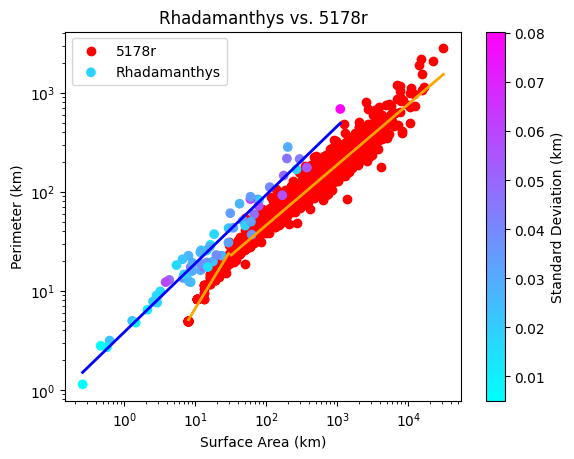

In [17]:
fig, ax = plt.subplots()

# x.perimeter_vs_surface()
split = fifty_one.split_dataset_by_surface(threshold)
slope, intercept, r_value, p_value, std_err = stats.linregress(
    np.log10(split[0][0]), np.log10(split[0][1])
)
print(
    f"5178r small| slope: {slope}| intercept: {intercept}| r_value: {r_value}| p_value:{p_value}| std_err: {std_err}"
)

x_axis = np.logspace(np.log10(min(split[0][0])), np.log10(max(split[0][0])), 50)
ax.plot(x_axis, (10**intercept) * (x_axis**slope), c="orange", linewidth=2)

slope, intercept, r_value, p_value, std_err = stats.linregress(
    np.log10(split[1][0]), np.log10(split[1][1])
)
print(
    f"5178r large| slope: {slope}| intercept: {intercept}| r_value: {r_value}| p_value:{p_value}| std_err: {std_err}"
)

x_axis = np.logspace(np.log10(min(split[1][0])), np.log10(max(split[1][0])), 50)
ax.plot(x_axis, (10**intercept) * (x_axis**slope), c="orange", linewidth=2)
ax.scatter(split[1][0], split[1][1], c="red", label="5178r")
ax.scatter(split[0][0], split[0][1], c="red")

rhad_surface_areas = [arr[0] for arr in rhad.data.values()]
rhad_perimeters = [arr[1] for arr in rhad.data.values()]
deviations = [arr[3] for arr in rhad.contour_data.values()]

slope, intercept, r_value, p_value, std_err = stats.linregress(
    np.log10(rhad_surface_areas), np.log10(rhad_perimeters)
)
print(
    f"Rhad| slope: {slope}| intercept: {intercept}| r_value: {r_value}| p_value:{p_value}| std_err: {std_err}"
)
x_axis = np.logspace(
    np.log10(min(rhad_surface_areas)), np.log10(max(rhad_surface_areas))
)
ax.plot(x_axis, (10**intercept) * x_axis**slope, c="blue", linewidth=2)

cm = plt.cm.get_cmap("cool")
im = ax.scatter(
    rhad_surface_areas, rhad_perimeters, c=deviations, label="Rhadamanthys", cmap=cm
)
fig.colorbar(im, ax=ax, label="Standard Deviation (km)")


ax.set_title("Rhadamanthys vs. 5178r")
ax.set_xlabel("Surface Area (km)")
ax.set_ylabel("Perimeter (km)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()
plt.show()